# Implementation of Generative Adversarial Networks (DCGAN)

## Karthick Kumaran Ayyalluseshagiri Viswanathan
### IMGS789

### Assignment-2
### GAN Implementation for Image Generation using MNIST

In [ ]:
!pip install tensorflow~=2.10.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.1/578.1 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 76.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 62.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 110.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 35.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 108.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 43.3 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.2
    Uninstalling tensorboard-data-server-0.7.2:
      Successfully uninstalled tensorboard-data-server-0.7.2
  

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [ ]:
# load dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


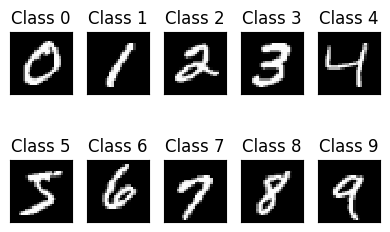

In [ ]:
WIDTH_SIZE = 4
HEIGHT_SIZE = 3

fig = plt.figure(figsize=(WIDTH_SIZE, HEIGHT_SIZE))
for i in range(10):
    plt.subplot(2, 5, i+1)
    x_y = X_train[y_train == i]
    plt.imshow(x_y[0], cmap='gray', interpolation='none')
    plt.title("Class %d" % (i))
    plt.xticks([])
    plt.yticks([])

plt.tight_layout()

In [ ]:
print('X_train.shape', X_train.shape)

# reshaping the inputs
X_train = X_train.reshape(60000, 28*28)

# normalizing the inputs (-1, 1)
X_train = (X_train.astype('float32') / 255 - 0.5) * 2

print('X_train reshape:', X_train.shape)

X_train.shape (60000, 28, 28)
X_train reshape: (60000, 784)


In [ ]:
# latent space dimension
latent_dim = 100

# image dimension 28x28
img_dim = 784

seed_value = 42
initializer = tf.keras.initializers.RandomNormal(
    mean=0.0, stddev=0.02, seed=seed_value
)

# Generator network
def generator():
  generatormodel = tf.keras.models.Sequential()

  # Input layer and hidden layer 1
  generatormodel.add(
      tf.keras.layers.Dense(
          128, input_shape=(latent_dim,), kernel_initializer=initializer
      )
  )
  generatormodel.add(tf.keras.layers.LeakyReLU(alpha=0.2))
  generatormodel.add(tf.keras.layers.BatchNormalization(momentum=0.8))

  # Hidden layer 2
  generatormodel.add(tf.keras.layers.Dense(256))
  generatormodel.add(tf.keras.layers.LeakyReLU(alpha=0.2))
  generatormodel.add(tf.keras.layers.BatchNormalization(momentum=0.8))

  # Hidden layer 3
  generatormodel.add(tf.keras.layers.Dense(512))
  generatormodel.add(tf.keras.layers.LeakyReLU(alpha=0.2))
  generatormodel.add(tf.keras.layers.BatchNormalization(momentum=0.8))

  # Output layer
  generatormodel.add(tf.keras.layers.Dense(img_dim, activation="tanh"))
  return generatormodel

In [ ]:
# prints a summary representation of the generator model
generatormodel = generator()
generatormodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               12928     
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 128)               0         
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 256)               0         
                                                                 
 batch_normalization_1 (Batc  (None, 256)              1024      
 hNormalization)                                        

In [ ]:
# Discriminator network
def discriminator():
  discriminatormodel = tf.keras.models.Sequential()

  # Input layer and hidden layer 1
  discriminatormodel.add(
      tf.keras.layers.Dense(
          128, input_shape=(img_dim,), kernel_initializer=initializer
      )
  )
  discriminatormodel.add(tf.keras.layers.LeakyReLU(alpha=0.2))

  # Hidden layer 2
  discriminatormodel.add(tf.keras.layers.Dense(256))
  discriminatormodel.add(tf.keras.layers.LeakyReLU(alpha=0.2))

  # Hidden layer 3
  discriminatormodel.add(tf.keras.layers.Dense(512))
  discriminatormodel.add(tf.keras.layers.LeakyReLU(alpha=0.2))

  # Output layer
  discriminatormodel.add(tf.keras.layers.Dense(1, activation="sigmoid"))
  return discriminatormodel

In [ ]:
# prints a summary representation of the discriminator model
discriminatormodel = discriminator()
discriminatormodel.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               100480    
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 256)               33024     
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 256)               0         
                                                                 
 dense_10 (Dense)            (None, 512)               131584    
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 512)               0         
                                                                 
 dense_11 (Dense)            (None, 1)                

In [ ]:
# Optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5)

discriminatormodel.compile(
    optimizer=optimizer,
    loss="binary_crossentropy",
    metrics=["binary_accuracy"],
)

In [ ]:
discriminatormodel.trainable = False

# Connect the generator and discriminator
d_g = tf.keras.models.Sequential()
d_g.add(generatormodel)
d_g.add(discriminatormodel)
d_g.compile(
    optimizer=optimizer,
    loss="binary_crossentropy",
    metrics=["binary_accuracy"],
)

In [ ]:
# prints a summary representation of your model
d_g.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 784)               583312    
                                                                 
 sequential_2 (Sequential)   (None, 1)                 265601    
                                                                 
Total params: 848,913
Trainable params: 581,520
Non-trainable params: 267,393
_________________________________________________________________


epoch = 1/100, d_loss=0.816, g_loss=1.347                                                                                                     
1/1 [==============================] - 0s 94ms/step


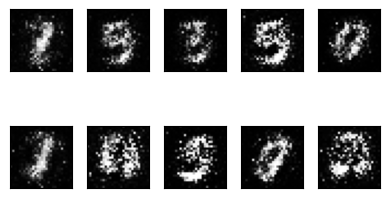

epoch = 2/100, d_loss=0.599, g_loss=1.760                                                                                                     
epoch = 3/100, d_loss=0.510, g_loss=1.542                                                                                                     
epoch = 4/100, d_loss=0.592, g_loss=1.370                                                                                                     
epoch = 5/100, d_loss=0.543, g_loss=1.371                                                                                                     
epoch = 6/100, d_loss=0.527, g_loss=1.257                                                                                                     
epoch = 7/100, d_loss=0.644, g_loss=1.207                                                                                                     
epoch = 8/100, d_loss=0.628, g_loss=1.222                                                                                                     

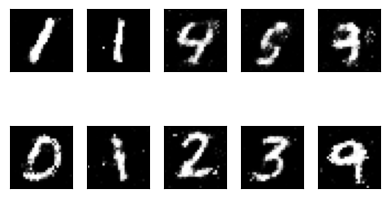

epoch = 12/100, d_loss=0.649, g_loss=1.111                                                                                                     
epoch = 13/100, d_loss=0.598, g_loss=1.116                                                                                                     
epoch = 14/100, d_loss=0.582, g_loss=1.069                                                                                                     
epoch = 15/100, d_loss=0.609, g_loss=0.995                                                                                                     
epoch = 16/100, d_loss=0.589, g_loss=1.076                                                                                                     
epoch = 17/100, d_loss=0.530, g_loss=1.104                                                                                                     
epoch = 18/100, d_loss=0.570, g_loss=1.018                                                                                              

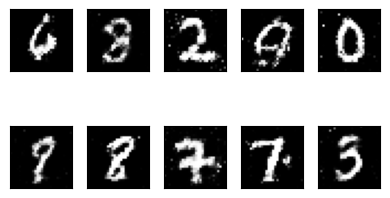

epoch = 22/100, d_loss=0.631, g_loss=1.077                                                                                                     
epoch = 23/100, d_loss=0.553, g_loss=1.044                                                                                                     
epoch = 24/100, d_loss=0.561, g_loss=0.975                                                                                                     
epoch = 25/100, d_loss=0.614, g_loss=1.117                                                                                                     
epoch = 26/100, d_loss=0.540, g_loss=1.127                                                                                                     
epoch = 27/100, d_loss=0.587, g_loss=1.127                                                                                                     
epoch = 28/100, d_loss=0.582, g_loss=1.077                                                                                              

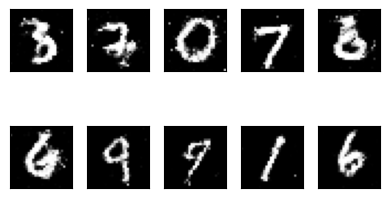

epoch = 32/100, d_loss=0.573, g_loss=1.201                                                                                                     
epoch = 33/100, d_loss=0.598, g_loss=1.160                                                                                                     
epoch = 34/100, d_loss=0.624, g_loss=1.105                                                                                                     
epoch = 35/100, d_loss=0.581, g_loss=1.095                                                                                                     
epoch = 36/100, d_loss=0.556, g_loss=1.168                                                                                                     
epoch = 37/100, d_loss=0.584, g_loss=1.081                                                                                                     
epoch = 38/100, d_loss=0.582, g_loss=1.132                                                                                              

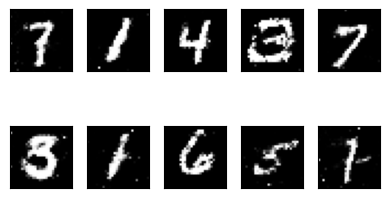

epoch = 42/100, d_loss=0.601, g_loss=1.122                                                                                                     
epoch = 43/100, d_loss=0.532, g_loss=1.200                                                                                                     
epoch = 44/100, d_loss=0.529, g_loss=1.149                                                                                                     
epoch = 45/100, d_loss=0.593, g_loss=1.147                                                                                                     
epoch = 46/100, d_loss=0.573, g_loss=1.148                                                                                                     
epoch = 47/100, d_loss=0.593, g_loss=1.276                                                                                                     
epoch = 48/100, d_loss=0.547, g_loss=1.238                                                                                              

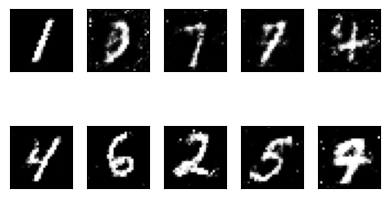

epoch = 52/100, d_loss=0.592, g_loss=1.169                                                                                                     
epoch = 53/100, d_loss=0.545, g_loss=1.233                                                                                                     
epoch = 54/100, d_loss=0.574, g_loss=1.203                                                                                                     
epoch = 55/100, d_loss=0.563, g_loss=1.197                                                                                                     
epoch = 56/100, d_loss=0.533, g_loss=1.199                                                                                                     
epoch = 57/100, d_loss=0.561, g_loss=1.267                                                                                                     
epoch = 58/100, d_loss=0.516, g_loss=1.114                                                                                              

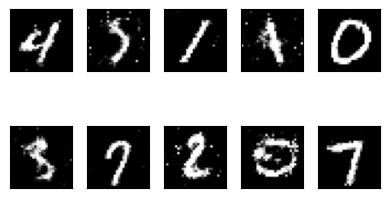

epoch = 62/100, d_loss=0.545, g_loss=1.226                                                                                                     
epoch = 63/100, d_loss=0.582, g_loss=1.303                                                                                                     
epoch = 64/100, d_loss=0.582, g_loss=1.208                                                                                                     
epoch = 65/100, d_loss=0.512, g_loss=1.426                                                                                                     
epoch = 66/100, d_loss=0.541, g_loss=1.330                                                                                                     
epoch = 67/100, d_loss=0.556, g_loss=1.241                                                                                                     
epoch = 68/100, d_loss=0.593, g_loss=1.256                                                                                              

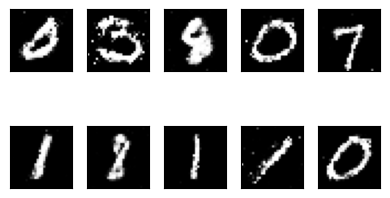

epoch = 72/100, d_loss=0.537, g_loss=1.410                                                                                                     
epoch = 73/100, d_loss=0.546, g_loss=1.277                                                                                                     
epoch = 74/100, d_loss=0.517, g_loss=1.277                                                                                                     
epoch = 75/100, d_loss=0.481, g_loss=1.384                                                                                                     
epoch = 76/100, d_loss=0.512, g_loss=1.288                                                                                                     
epoch = 77/100, d_loss=0.559, g_loss=1.420                                                                                                     
epoch = 78/100, d_loss=0.534, g_loss=1.338                                                                                              

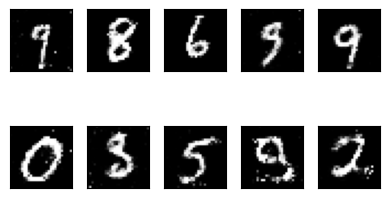

epoch = 82/100, d_loss=0.489, g_loss=1.289                                                                                                     
epoch = 83/100, d_loss=0.523, g_loss=1.305                                                                                                     
epoch = 84/100, d_loss=0.545, g_loss=1.417                                                                                                     
epoch = 85/100, d_loss=0.512, g_loss=1.558                                                                                                     
epoch = 86/100, d_loss=0.574, g_loss=1.505                                                                                                     
epoch = 87/100, d_loss=0.505, g_loss=1.532                                                                                                     
epoch = 88/100, d_loss=0.508, g_loss=1.538                                                                                              

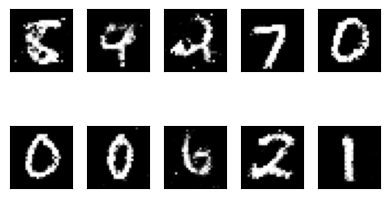

epoch = 92/100, d_loss=0.467, g_loss=1.474                                                                                                     
epoch = 93/100, d_loss=0.528, g_loss=1.500                                                                                                     
epoch = 94/100, d_loss=0.510, g_loss=1.571                                                                                                     
epoch = 95/100, d_loss=0.506, g_loss=1.486                                                                                                     
epoch = 96/100, d_loss=0.492, g_loss=1.502                                                                                                     
epoch = 97/100, d_loss=0.490, g_loss=1.297                                                                                                     
epoch = 98/100, d_loss=0.504, g_loss=1.437                                                                                              

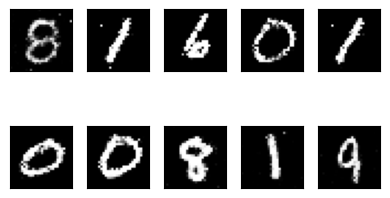

In [ ]:
epochs = 100
batch_size = 64
smooth = 0.1

real = tf.ones(shape=(batch_size, 1))
fake = tf.zeros(shape=(batch_size, 1))

d_loss = []
d_g_loss = []

for e in range(epochs + 1):
    for i in range(len(X_train) // batch_size):
        # Train Discriminator weights
        discriminatormodel.trainable = True

        # Real samples
        X_batch = X_train[i * batch_size : (i + 1) * batch_size]
        d_loss_real = discriminatormodel.train_on_batch(
            x=X_batch, y=real * (1 - smooth)
        )

        # Fake Samples
        z = tf.random.normal(shape=(batch_size, latent_dim), mean=0, stddev=1)
        X_fake = generatormodel.predict_on_batch(z)
        d_loss_fake = discriminatormodel.train_on_batch(x=X_fake, y=fake)

        # Discriminator loss
        d_loss_batch = 0.5 * (d_loss_real[0] + d_loss_fake[0])

        # Train Generator weights
        discriminatormodel.trainable = False

        z = tf.random.normal(shape=(batch_size, latent_dim), mean=0, stddev=1)
        d_g_loss_batch = d_g.train_on_batch(x=z, y=real)

        print(
            "epoch = %d/%d, batch = %d/%d, d_loss=%.3f, g_loss=%.3f"
            % (
                e + 1,
                epochs,
                i,
                len(X_train) // batch_size,
                d_loss_batch,
                d_g_loss_batch[0],
            ),
            100 * " ",
            end="\r",
        )

    d_loss.append(d_loss_batch)
    d_g_loss.append(d_g_loss_batch[0])
    print(
        "epoch = %d/%d, d_loss=%.3f, g_loss=%.3f"
        % (e + 1, epochs, d_loss[-1], d_g_loss[-1]),
        100 * " ",
    )

    if e % 10 == 0:
        samples = 10

        z = tf.random.normal(shape=(samples, latent_dim), mean=0, stddev=1)
        x_fake = generatormodel.predict(z)

        fig = plt.figure(figsize=(WIDTH_SIZE, HEIGHT_SIZE))
        for k in range(samples):
            plt.subplot(2, 5, k + 1)
            plt.imshow(x_fake[k].reshape(28, 28), cmap="gray")
            plt.xticks([])
            plt.yticks([])

        plt.tight_layout()
        plt.show()

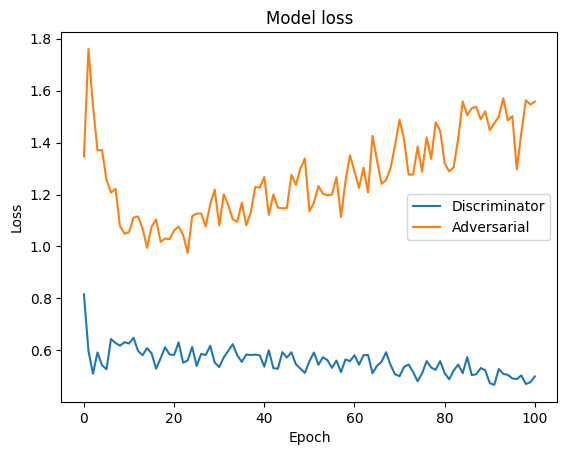

In [ ]:
# plotting the metrics
plt.plot(d_loss)
plt.plot(d_g_loss)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Discriminator', 'Adversarial'], loc='center right')
plt.show()